In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../seq_lat_results.csv")
df = df[~df.lock_name.str.contains("peterson")]
average_cycles_key = " average_cycles"
num_of_threads_key = " number_of_threads"
df.head(100)

,lock_name,number_of_threads,average_cycles
0,./build/filter_lock_seq_lat.o,2,160
1,./build/filter_lock_seq_lat.o,3,272
2,./build/filter_lock_seq_lat.o,4,380
3,./build/filter_lock_seq_lat.o,5,508
4,./build/filter_lock_seq_lat.o,6,634
...,...,...,...
82,./build/ttas_lock_seq_lat.o,4,37
83,./build/ttas_lock_seq_lat.o,5,37
84,./build/ttas_lock_seq_lat.o,6,79
85,./build/ttas_lock_seq_lat.o,7,40


<IPython.core.display.Javascript object>


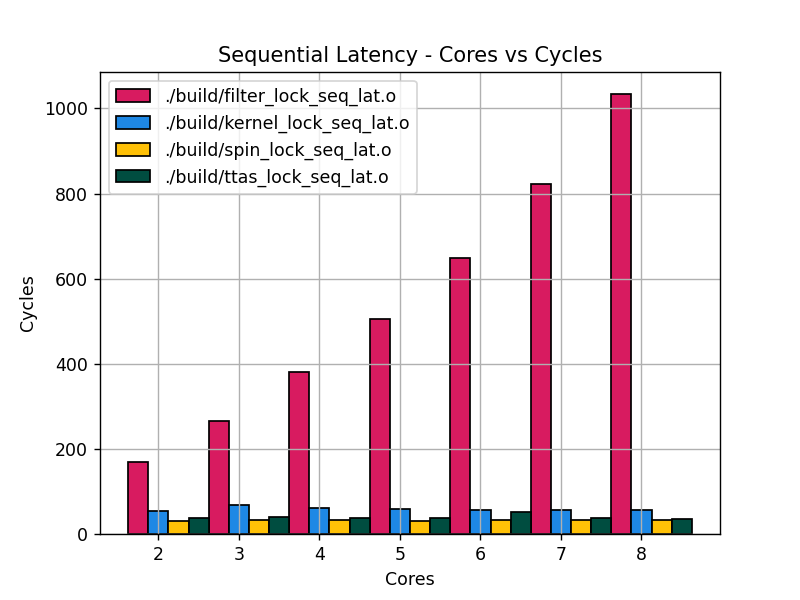

7


In [16]:
grouping = df.groupby([num_of_threads_key])
bar_width = 0.25
unique_names = list(df.lock_name.unique())
num_of_locks = len(unique_names)
time_index = np.arange(df[num_of_threads_key].max() - df[num_of_threads_key].min() + 1 )

bars_spacing = [time_index + (bar_width*(x)) for x in range(num_of_locks)]
# Reduce duplicate test entries by taking their mean
average_cycles = [group.groupby("lock_name")[average_cycles_key].mean() for _, group in grouping]
# Transposing will put the values of each test in the same array
average_cycles = np.transpose(average_cycles)
colors = ["#D81B60", "#1E88E5", "#FFC107", "#004D40"]
for lock_name, color, x_axis, height in zip(unique_names, colors, bars_spacing, average_cycles):
    plt.bar(x_axis, height, color=color, width=bar_width, edgecolor="black", label=lock_name)

plt.xticks([r+bar_width for r in range(average_cycles.shape[1])], [x+2 for x in range(average_cycles.shape[1])])
plt.xlabel("Cores")
plt.ylabel("Cycles")
plt.title("Sequential Latency - Cores vs Cycles")
plt.grid(True)
plt.legend()
plt.savefig("../write_up/progress_report/sequential_latency.png")
plt.show()